In [5]:
! pip3 install wordcloud

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [6]:
import pandas
import numpy 
import seaborn 
import matplotlib.pyplot as mtp
import warnings
from collections import Counter
import wordcloud 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [7]:
dataset = pandas.read_csv("/Users/utkarsh/Personality_analyzer/mbti_dataset.csv")
dataset.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [8]:
dataset.isnull().any()

type     False
posts    False
dtype: bool

In [9]:
dataset.shape

(8675, 2)

In [10]:
dataset.dropna()

type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

In [11]:
dataset.shape

(8675, 2)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [13]:
dataset['type'].describe()

count     8675
unique      16
top       INFP
freq      1832
Name: type, dtype: object

In [14]:
numpy.unique(dataset["type"])

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [15]:
dataset.groupby("type").count()

posts
type       
ENFJ    190
ENFP    675
ENTJ    231
ENTP    685
ESFJ     42
ESFP     48
ESTJ     39
ESTP     89
INFJ   1470
INFP   1832
INTJ   1091
INTP   1304
ISFJ    166
ISFP    271
ISTJ    205
ISTP    337

In [16]:
df = dataset.copy()
df['words_per_comment'] = [len(i.split()) for i in df['posts']]
df.head()

type                                              posts  words_per_comment
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...                556
1  ENTP  'I'm finding the lack of me in these posts ver...               1170
2  INTP  'Good one  _____   https://www.youtube.com/wat...                836
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...               1064
4  ENTJ  'You're fired.|||That's another silly misconce...                967

<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

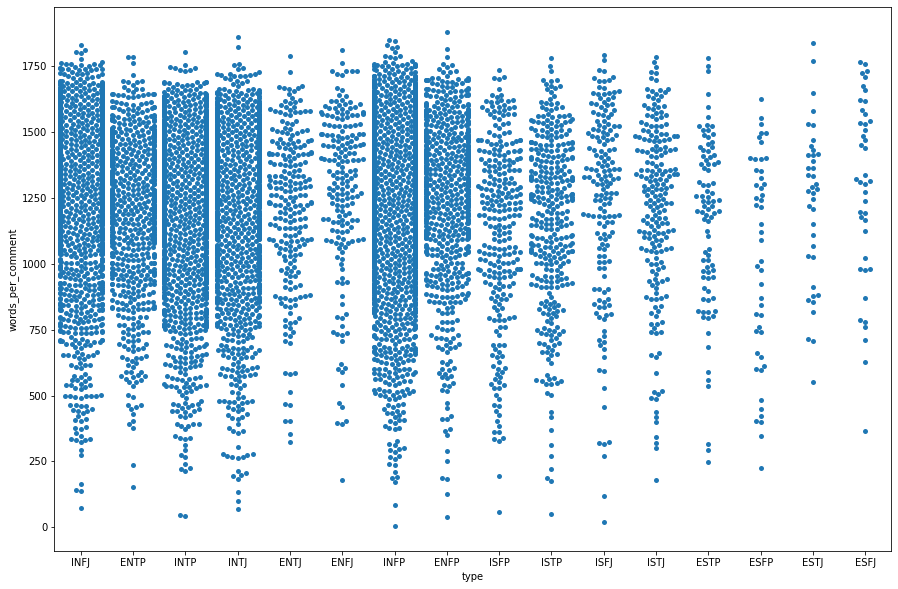

In [17]:
warnings.filterwarnings("ignore")
mtp.figure(figsize=(15 , 10))
seaborn.swarmplot(x = "type" , y ="words_per_comment" , data = df)

In [18]:
df["length_of_post"] = [len(i) for i in df['posts']]
df.head()

type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...                556   
1  ENTP  'I'm finding the lack of me in these posts ver...               1170   
2  INTP  'Good one  _____   https://www.youtube.com/wat...                836   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...               1064   
4  ENTJ  'You're fired.|||That's another silly misconce...                967   

   length_of_post  
0            4652  
1            7053  
2            5265  
3            6271  
4            6111

<AxesSubplot:xlabel='length_of_post', ylabel='Density'>

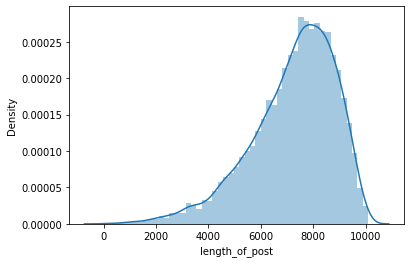

In [19]:
seaborn.distplot(df['length_of_post'])

In [20]:
words = [i.split() for i in df['posts']]
words = [word for sublist in words for word in sublist]
Counter(words).most_common(50)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109)]

In [21]:
# w_cloud = wordcloud.WordCloud(background_color="white").generate(" ".join(words))

In [22]:
# mtp.figure(figsize=(20,10))
# mtp.imshow(w_cloud)

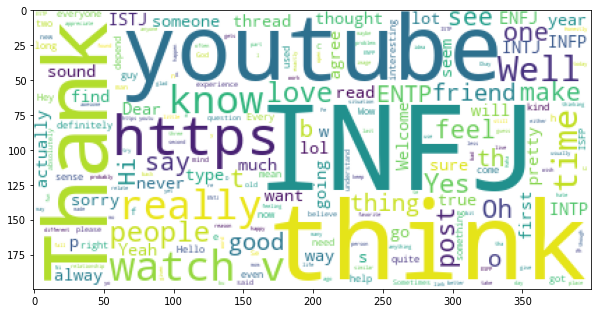

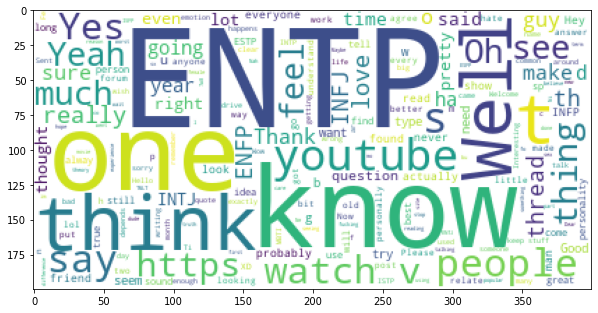

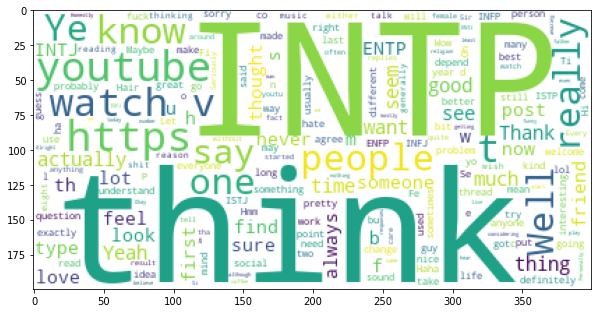

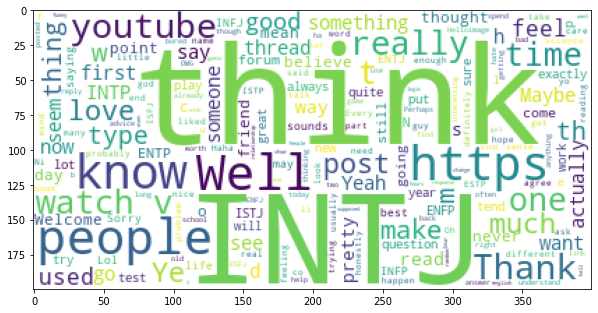

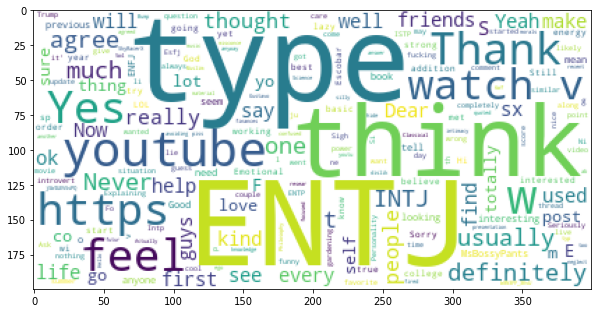

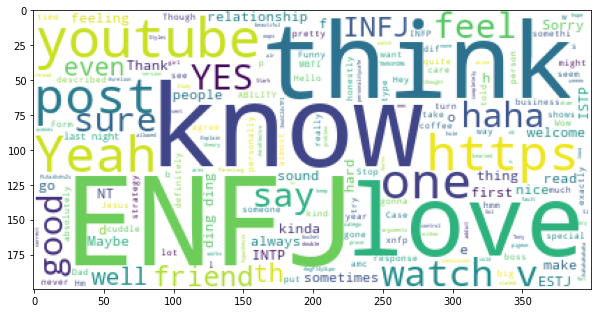

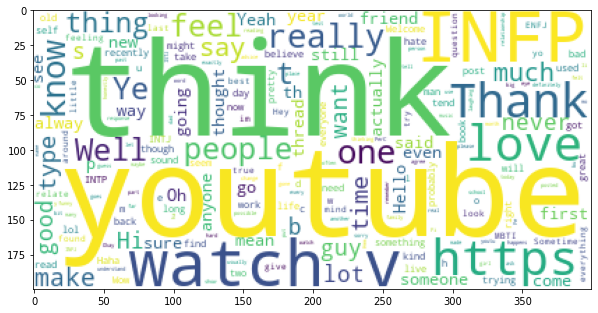

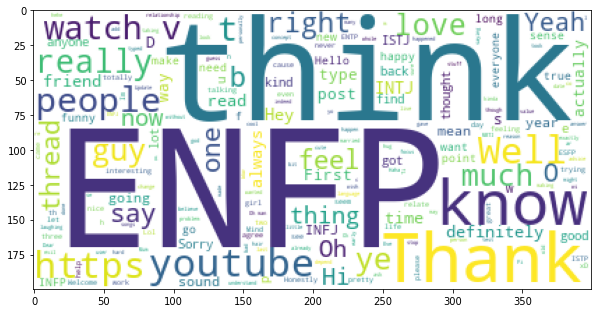

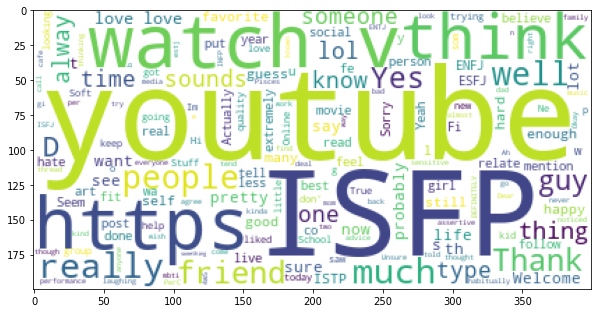

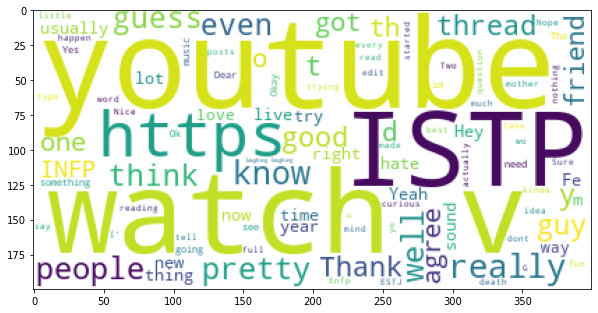

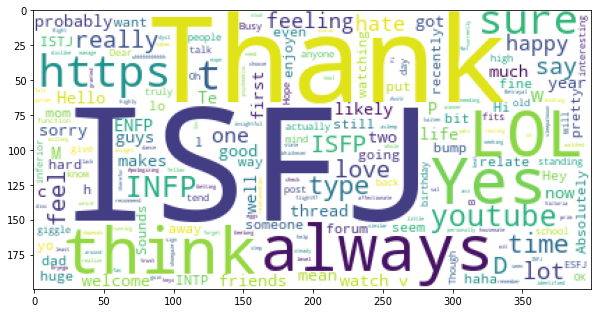

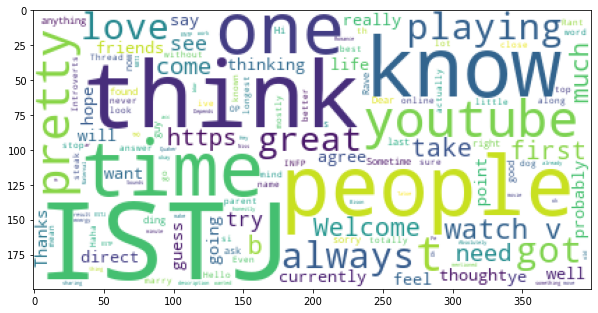

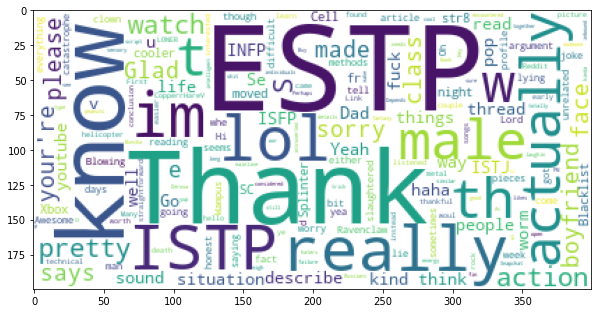

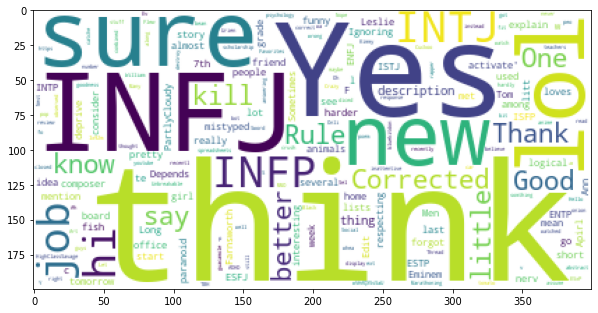

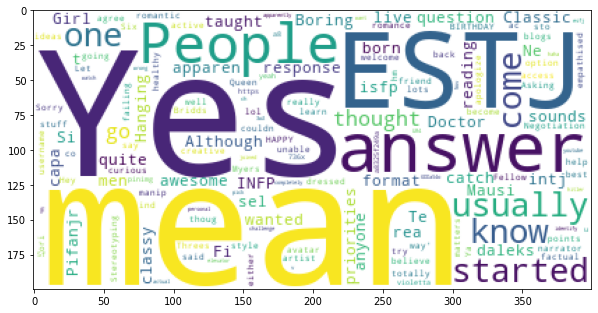

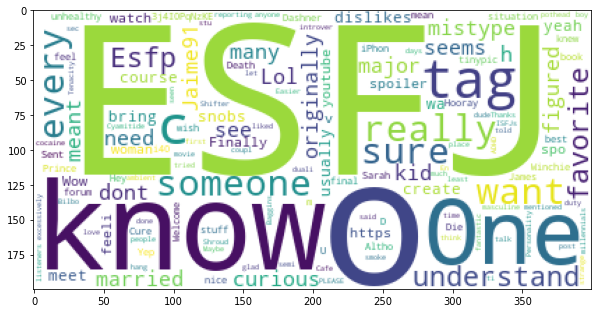

In [23]:
types = list(df["type"].unique())
for i in types:
    df_new = df[df["type"]==i]
    w_cloud = wordcloud.WordCloud(background_color="white").generate(df_new["posts"].to_string())
    mtp.figure(figsize=(10,10))
    mtp.imshow(w_cloud)

In [24]:
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append([posts[0], post])

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
posts

[['INFJ', "'http://www.youtube.com/watch?v=qsXHcwe3krw"],
 ['INFJ', 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg'],
 ['INFJ',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks'],
 ['INFJ', 'What has been the most life-changing experience in your life?'],
 ['INFJ',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.'],
 ['INFJ', 'May the PerC Experience immerse you.'],
 ['INFJ',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206'],
 ['INFJ',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as..."],
 ['INFJ',
  '84389  84390  http://wallpaperpassion.com/upload/23700/

In [25]:
# import re

# def preprocess_posts(posts):
#     posts = posts.replace("|", " ")
#     posts = re.sub(r'https?:\/\/.*?[\s+]', '', posts)
#     posts = re.sub(r'\.', ' EOSTokenDot ', posts + " ")
#     posts = re.sub(r'\?', ' EOSTokenQuest ', posts)
#     posts = re.sub(r'!', ' EOSTokenExs ', posts)
#     posts = re.sub(r'\.+', '.', posts)
#     posts = re.sub(r'[^\w\s]', '', posts)
#     posts = re.sub(r'[^a-zA-Z\s]', '', posts)
#     posts = posts.lower()
#     posts = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', posts)
#     posts = re.sub(r'(\b\w{0,3})?\b', '', posts)
#     posts = re.sub(r'(\b\w{30,1000})?\b', '', posts)
#     personality_words = ['infp', 'infj', 'intp', 'intj', 'entp', 'enfp', 'istp', 'isfp', 'entj', 'istj', 'enfj', 'isfj', 'estp', 'esfp', 'esfj', 'estj']
#     for word in personality_words:
#         posts = posts.replace(word, '')
#     return posts


# labels = df["type"].copy()
# df_new = pandas.DataFrame()
# df_new["type"] = labels
# df_new["posts"] = df["posts"].apply(preprocess_posts)

def preprocess_text(df, remove_special=True):
    texts = df['posts'].copy()
    labels = df['type'].copy()

    #Remove links 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #Keep the End Of Sentence characters
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    #Strip Punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #Remove multiple fullstops
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #Convert posts to lowercase
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    #Remove multiple letter repeating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #Remove very short or long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove MBTI Personality Words - crutial in order to get valid model accuracy estimation for unseen data. 
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")
    
    return df

#Preprocessing of entered Text
df_new = preprocess_text(df)

In [26]:
df_new.head()

type                                              posts  words_per_comment  \
0  INFJ      enfp  intj moments   sportscenter    plays...                556   
1  ENTP   finding  lack    these posts very alarming eo...               1170   
2  INTP  good         course  which    know thats  bles...                836   
3  INTJ  dear intp    enjoyed  conversation  other  eos...               1064   
4  ENTJ  youre fired eostokendot    thats another silly...                967   

   length_of_post  
0            4652  
1            7053  
2            5265  
3            6271  
4            6111

In [27]:
df_new

type                                              posts  \
0     INFJ      enfp  intj moments   sportscenter    plays...   
1     ENTP   finding  lack    these posts very alarming eo...   
2     INTP  good         course  which    know thats  bles...   
3     INTJ  dear intp    enjoyed  conversation  other  eos...   
4     ENTJ  youre fired eostokendot    thats another silly...   
...    ...                                                ...   
8670  ISFP    ixfp just because  always think  cats   doms...   
8671  ENFP   eostokendot  eostokendot  eostokendot  this t...   
8672  INTP   many questions when   these things eostokendo...   
8673  INFP    very conflicted right  when  comes  wanting ...   
8674  INFP    been  long since  have been  personalitycafe...   

      words_per_comment  length_of_post  
0                   556            4652  
1                  1170            7053  
2                   836            5265  
3                  1064            6271  
4                   967            6111  
...                 ...             ...  
8670                796            5011  
8671               1309            7902  
8672                948            5772  
8673               1705            9479  
8674               1361            7418  

[8675 rows x 4 columns]

In [28]:
df_new.head()

type                                              posts  words_per_comment  \
0  INFJ      enfp  intj moments   sportscenter    plays...                556   
1  ENTP   finding  lack    these posts very alarming eo...               1170   
2  INTP  good         course  which    know thats  bles...                836   
3  INTJ  dear intp    enjoyed  conversation  other  eos...               1064   
4  ENTJ  youre fired eostokendot    thats another silly...                967   

   length_of_post  
0            4652  
1            7053  
2            5265  
3            6271  
4            6111

In [29]:
df_new["n_words"] = df_new["posts"].apply(lambda x: len(re.findall(r'\w+', x)))
df_new = df_new[df_new["n_words"]>=15]
df_new.shape

(8466, 5)

In [30]:
df_new

type                                              posts  \
0     INFJ      enfp  intj moments   sportscenter    plays...   
1     ENTP   finding  lack    these posts very alarming eo...   
2     INTP  good         course  which    know thats  bles...   
3     INTJ  dear intp    enjoyed  conversation  other  eos...   
4     ENTJ  youre fired eostokendot    thats another silly...   
...    ...                                                ...   
8670  ISFP    ixfp just because  always think  cats   doms...   
8671  ENFP   eostokendot  eostokendot  eostokendot  this t...   
8672  INTP   many questions when   these things eostokendo...   
8673  INFP    very conflicted right  when  comes  wanting ...   
8674  INFP    been  long since  have been  personalitycafe...   

      words_per_comment  length_of_post  n_words  
0                   556            4652      430  
1                  1170            7053      803  
2                   836            5265      253  
3                  1064            6271      777  
4                   967            6111      402  
...                 ...             ...      ...  
8670                796            5011      564  
8671               1309            7902       18  
8672                948            5772      715  
8673               1705            9479     1184  
8674               1361            7418      877  

[8466 rows x 5 columns]

In [31]:
en = LabelEncoder()
df_new["encoded_type"] = en.fit_transform(df_new["type"])
df_new.head()


type                                              posts  words_per_comment  \
0  INFJ      enfp  intj moments   sportscenter    plays...                556   
1  ENTP   finding  lack    these posts very alarming eo...               1170   
2  INTP  good         course  which    know thats  bles...                836   
3  INTJ  dear intp    enjoyed  conversation  other  eos...               1064   
4  ENTJ  youre fired eostokendot    thats another silly...                967   

   length_of_post  n_words  encoded_type  
0            4652      430             8  
1            7053      803             3  
2            5265      253            11  
3            6271      777            10  
4            6111      402             2

In [32]:
df.shape

(8675, 5)

In [33]:
#vectorizing the posts while removing the stop words 
vect = CountVectorizer(stop_words='english') 
train =  vect.fit_transform(df_new["posts"])

target = df_new["encoded_type"]

In [34]:
train.shape

(8466, 98555)

In [35]:
target.shape

(8466,)

In [36]:
x_train , x_test , y_train , y_test = train_test_split(train , target , test_size = 0.4 )

In [46]:
print(x_train)

  (0, 156)	2
  (0, 226)	1
  (0, 255)	1
  (0, 804)	1
  (0, 1048)	1
  (0, 1606)	5
  (0, 2637)	1
  (0, 4066)	1
  (0, 4093)	1
  (0, 4119)	1
  (0, 4900)	1
  (0, 4995)	1
  (0, 5077)	2
  (0, 5111)	1
  (0, 5181)	1
  (0, 7570)	1
  (0, 7963)	2
  (0, 8215)	1
  (0, 8681)	1
  (0, 9215)	1
  (0, 9490)	1
  (0, 9590)	1
  (0, 10250)	1
  (0, 10307)	1
  (0, 10755)	1
  :	:
  (5078, 93472)	4
  (5078, 93486)	2
  (5078, 93514)	2
  (5078, 93586)	2
  (5078, 94369)	2
  (5078, 94374)	1
  (5078, 94404)	1
  (5078, 94551)	1
  (5078, 94582)	2
  (5078, 94748)	1
  (5078, 94928)	1
  (5078, 95004)	2
  (5078, 96121)	1
  (5078, 96382)	1
  (5078, 96402)	1
  (5078, 96442)	2
  (5078, 96587)	3
  (5078, 96696)	3
  (5078, 96755)	1
  (5078, 96765)	2
  (5078, 96831)	1
  (5078, 96996)	2
  (5078, 97022)	1
  (5078, 97657)	2
  (5078, 98080)	1


In [38]:
x_train.shape

(5079, 98555)

In [39]:
y_train.shape

(5079,)

In [40]:
x_test.shape

(3387, 98555)

In [41]:
y_test.shape

(3387,)

In [42]:
accuracies = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.93%
